In [10]:
import processing as prlib
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import soundfile as sf

In [11]:
_, train, test, validation = prlib.get_dataframes()

[0 0 0 ... 0 0 0] 142464


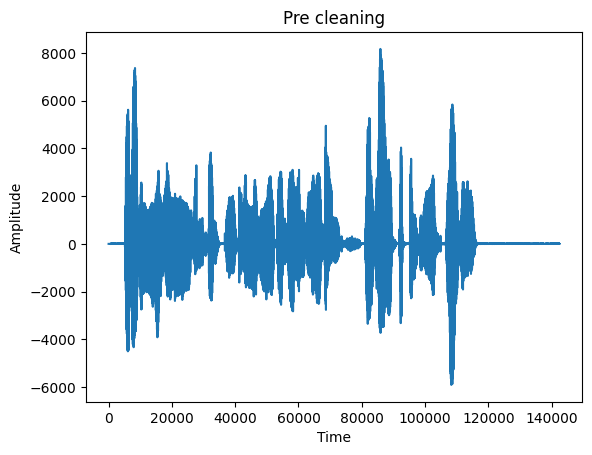

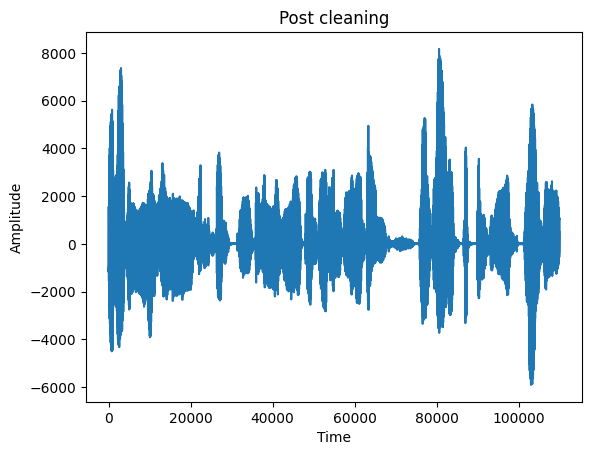

In [12]:
#Pre clean
wave = read(prlib.get_path('train', 'common_voice_ar_19061960.wav'))
sample_rate = wave[0]
audio = wave[1]
print(audio, len(audio))
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Pre cleaning")
plt.show()

#Post clean
clean_audio = prlib.clean_sound(wave[1])
plt.plot(clean_audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Post cleaning")
plt.show()

Remove empty sound from audio files

In [6]:
"""
audio_data_int16 = clean_audio.astype(np.int16)
output_filename = 'output_audio.wav'
print("Array shape:", audio_data_int16.shape)
print("Data type:", audio_data_int16.dtype)
sf.write(output_filename, audio_data_int16, sample_rate)
"""

'\naudio_data_int16 = clean_audio.astype(np.int16)\noutput_filename = \'output_audio.wav\'\nprint("Array shape:", audio_data_int16.shape)\nprint("Data type:", audio_data_int16.dtype)\nsf.write(output_filename, audio_data_int16, sample_rate)\n'

In [ ]:
type = ["train", "test", "validation"]
dfs = [train, test, validation]
path = "./data/wav_files/"
path_clean = "./data/wav_files_clean/"
errors = []
for i in range(len(type)):
    curr_df = dfs[i]
    #curr_df['new_paths'] = np.nan
    error = []
    for j in range(len(curr_df)): 
        wav_name = str(curr_df['paths'][j])
        audio = prlib.get_data(prlib.get_path(type[i], wav_name))
        try:
            clean_audio = prlib.clean_sound(audio)
        except: 
            error.append((audio, wav_name))
        audio_data_int16 = clean_audio.astype(np.int16)
        #wav_name = wav_name.split("_")[2] + "_" + str(j) + ".wav"
        #curr_df.loc[j, "new_paths"] = wav_name
        output_filename = path_clean + type[i] + "/" +  wav_name
        sf.write(output_filename, audio_data_int16, sample_rate)
    errors.append(error)